In [1]:
# Load the dataset using sklearn.datasets.load_breast_cancer()
# Split the dataset into training and testing sets using train_test_split()
# Standardize the features to have zero mean and unit variance using StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

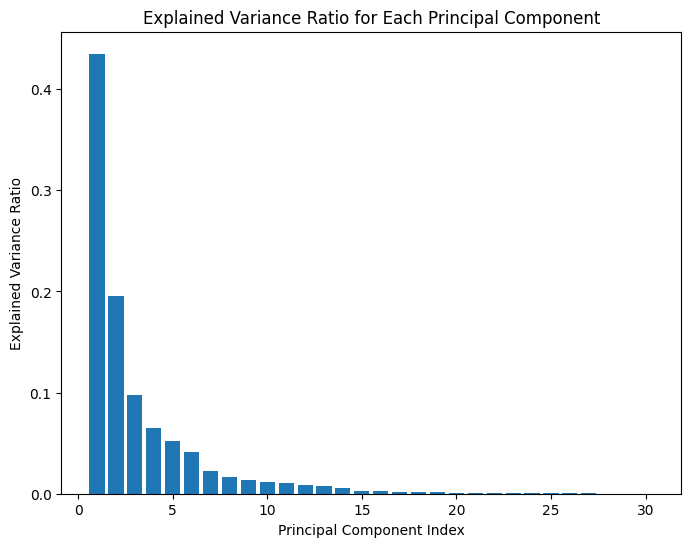

In [2]:
# Perform PCA on the standardized training set using PCA() from scikit-learn
# Plot the explained variance ratio for each principal component

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

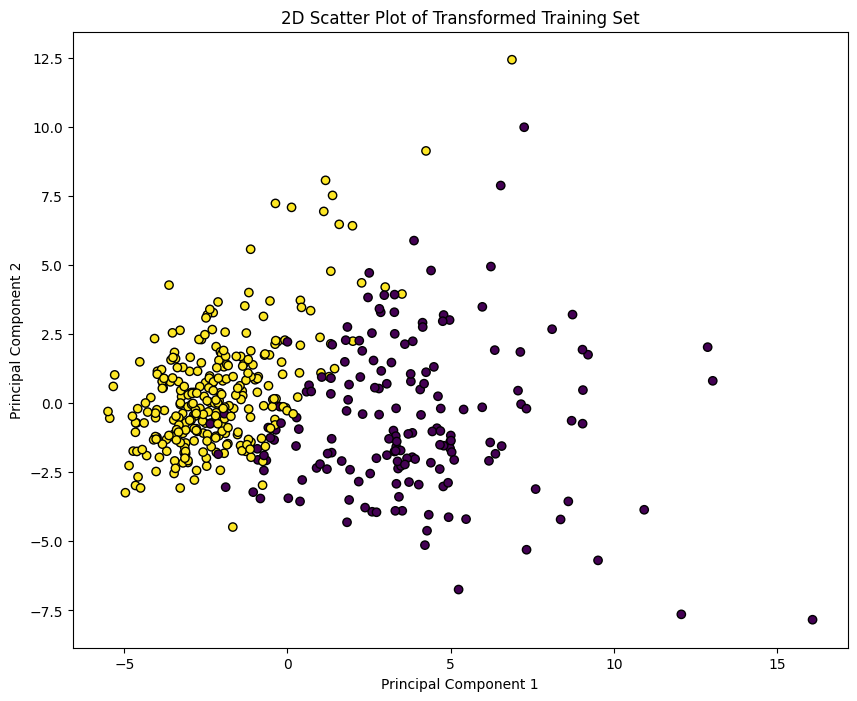

In [3]:
# Transform the data onto the first two principal components.
# Visualize the transformed training set in a 2D scatter plot. Use different colors or markers for the two classes.

X_train_pca_2d = X_train_pca[:, :2]
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of Transformed Training Set')
plt.show()

In [4]:
# Train a logistic regression model on the transformed training set.
# Evaluate the model on the transformed test set using appropriate metrics.

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test_std)
y_pred = logreg.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.97

Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

